In [2]:
%load_ext autoreload
%autoreload 2

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import shap

from src.visual_clues import VisualClues
from src.image_classifier import InterpretableImageClassifier

In [4]:
# We take 10 dog breeds here
class_domain = 'dog'
class_labels_list = ['Bulldog', 'Scotch Terrier', 'Beagle', 'Chihuahua', 'Saluki', 'Lhasa', 'Clumber', 'Doberman', 'Chow', 'African Hunting Dog']

# We choose the Standford Dogs dataset
image_dir = '../libsearch/stanford-dogs/images/Images'
annotation_dir = '../libsearch/stanford-dogs/annotations/Annotation'

# We use already-generated tree and data_model dataframe (LLMs predictions and image embeddings take time to run)
visual_clue_tree_path = 'data/dog_visual_clues_dict_10.json'
data_model_path = 'data/dog_visual_clues_similarities_10.csv'

# Get class domain visual tree

In [5]:
visual_clues = VisualClues(
    class_domain = class_domain,
    class_labels_list = class_labels_list,
    visual_clue_tree_path = visual_clue_tree_path
)

In [6]:
visual_clues.get_visual_clues_class_domain_dict()

The file 'data/dog_visual_clues_dict_10.json' already exists.


In [ ]:
visual_clues.class_domain_visual_clues_list

In [ ]:
visual_clues.sorted_values_dict

In [7]:
visual_clues.get_visual_clues_embeddings()

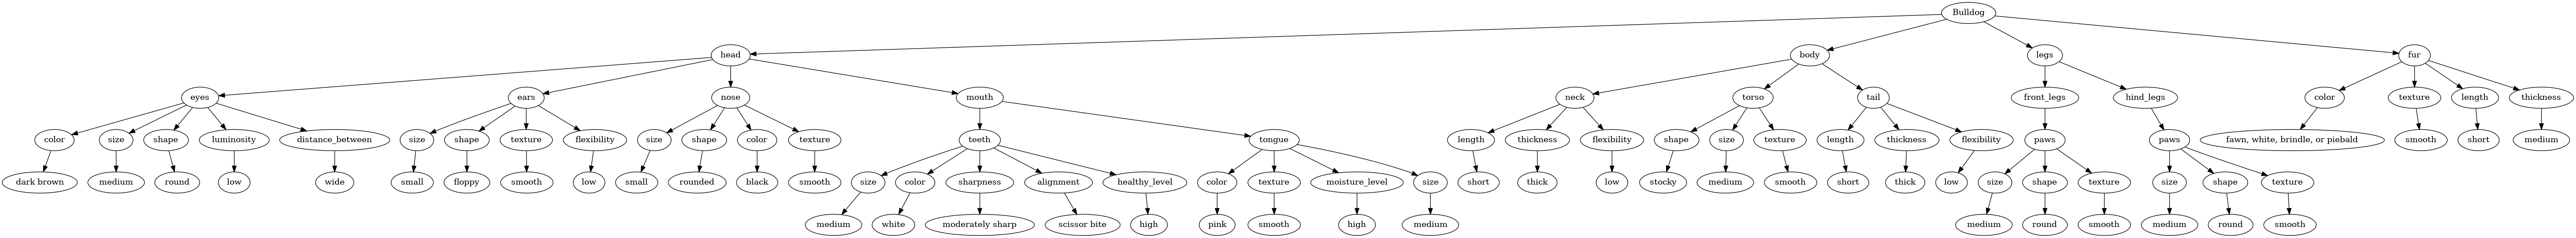

In [28]:
visual_clues.get_class_label_tree_image('Bulldog', 'outputs/bulldog_tree')

# Fit classifier

In [9]:
img_classifier = InterpretableImageClassifier(
    class_domain = class_domain,
    class_labels_list = class_labels_list,
    visual_clues_embeddings = visual_clues.visual_clues_embeddings,
    image_dir = image_dir,
    annotation_dir = annotation_dir,
    class_label_folders = True,
    data_model_path = data_model_path
)    

In [10]:
df_model = img_classifier.create_data_model_df()

The file 'data/dog_visual_clues_similarities_10.csv' already exists.


In [38]:
df_model

,class_label,image_name,the fur texture of the neck is smooth,the flexibility of the ears is stiff,the fur length of the hind_legs paws is short,the claw sharpness of the hind paws is very sharp,"the color of the fur is red, black, blue, fawn, cream",the claw sharpness of the front paws is very sharp,the luminosity of the eyes is moderate,the texture of the fur is silky,...,the flexibility of the ears is high,the color of the belly matches body color,the fur length of the front legs paws is short,the fur length of the hind paws is short,the sharpness of the claws is moderately sharp,the fur color of the back is black and tan,the thickness of the neck is slender,the fur texture of the neck is dense,the size of the nose is small,the width of the back is moderate
0,Chihuahua,n02085620_3045,0.161216,0.182279,0.167816,0.156847,0.210202,0.178690,0.130356,0.164290,...,0.188311,0.178257,0.185115,0.166756,0.154443,0.155602,0.149541,0.159864,0.168969,0.129423
1,Chihuahua,n02085620_3942,0.203049,0.277777,0.206465,0.205923,0.247919,0.231452,0.178718,0.184020,...,0.271274,0.193573,0.212930,0.212879,0.172582,0.221880,0.198004,0.196799,0.236632,0.151845
2,Chihuahua,n02085620_3402,0.204543,0.255857,0.202277,0.210075,0.211503,0.226324,0.172146,0.200675,...,0.247774,0.195563,0.211799,0.211067,0.189406,0.193076,0.196834,0.199956,0.210314,0.166363
3,Chihuahua,n02085620_4673,0.186748,0.237095,0.166150,0.174659,0.203893,0.209217,0.156406,0.177490,...,0.234361,0.153233,0.192861,0.179573,0.147489,0.196798,0.174412,0.176556,0.219138,0.141336
4,Chihuahua,n02085620_1569,0.207945,0.217640,0.225167,0.163324,0.255428,0.198794,0.156906,0.219534,...,0.217498,0.189914,0.242109,0.220316,0.141943,0.258494,0.182587,0.194198,0.201745,0.161852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,Doberman,n02107142_4632,0.183794,0.263383,0.227447,0.228970,0.228190,0.239728,0.154021,0.166431,...,0.260163,0.179351,0.230375,0.226558,0.212879,0.240472,0.212953,0.175122,0.197908,0.181743
1711,Doberman,n02107142_21,0.198733,0.229712,0.171864,0.166934,0.199631,0.207249,0.168918,0.162366,...,0.232451,0.156867,0.201311,0.176537,0.182993,0.233793,0.208592,0.185120,0.231913,0.162327
1712,Doberman,n02107142_17564,0.185798,0.238111,0.184428,0.184391,0.171251,0.195019,0.137787,0.144199,...,0.245588,0.167113,0.193566,0.173437,0.163351,0.169895,0.247419,0.171782,0.183900,0.154471
1713,Doberman,n02107142_13677,0.179991,0.233249,0.184951,0.205507,0.212963,0.237949,0.122473,0.149957,...,0.233101,0.142607,0.206417,0.190680,0.223564,0.205099,0.208297,0.177320,0.198014,0.155788


In [11]:
img_classifier.fit(select_most_important_features=False)

Accuracy: 0.8837
Precision: 0.8907
Recall: 0.8837
F1 Score: 0.8835
                     precision    recall  f1-score   support

African_hunting_dog       0.82      1.00      0.90        18
          Chihuahua       0.91      0.71      0.80        14
           Doberman       1.00      0.88      0.93         8
     French_bulldog       0.94      0.89      0.91        18
              Lhasa       0.90      0.82      0.86        22
             Saluki       0.94      0.85      0.89        20
     Scotch_terrier       0.75      0.94      0.83        16
             beagle       0.88      0.94      0.91        16
               chow       0.92      0.92      0.92        26
            clumber       0.86      0.86      0.86        14

           accuracy                           0.88       172
          macro avg       0.89      0.88      0.88       172
       weighted avg       0.89      0.88      0.88       172




the true class_label is : French_bulldog
the predicted class_label is : French_bulldog


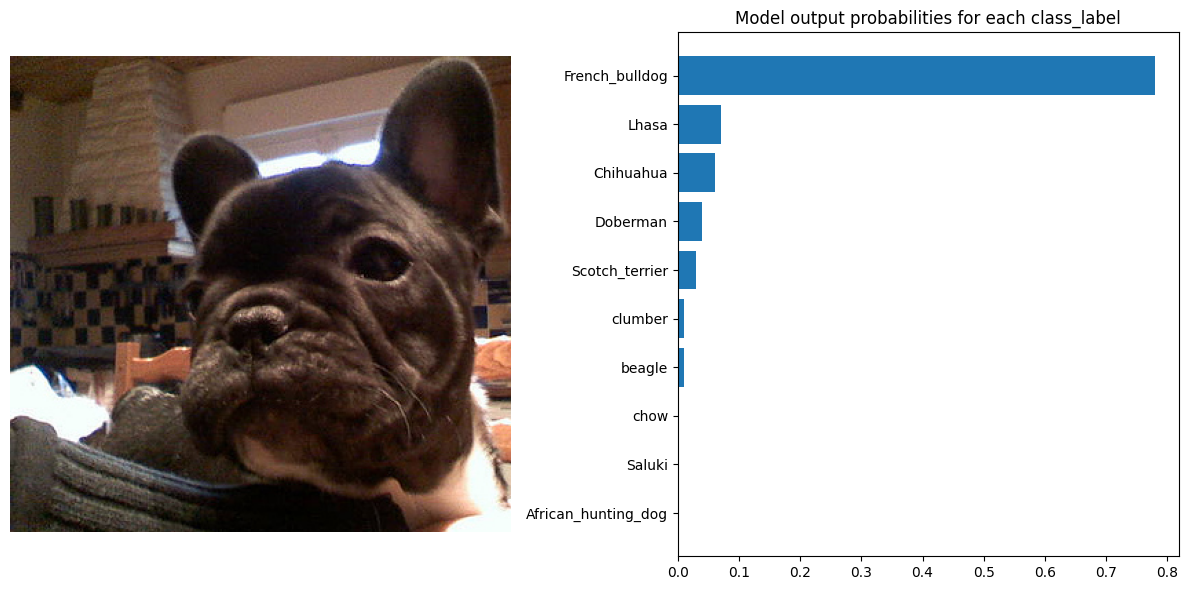

In [38]:
img_classifier.predict(image_name='n02108915-French_bulldog/n02108915_8923',
                       output_path='outputs/prediction_example.png')

In [13]:
feature_importance_df = img_classifier.calculate_feature_importance(method='gini')

# Interpret model

### What visual elements best distinguish the labels in a class?

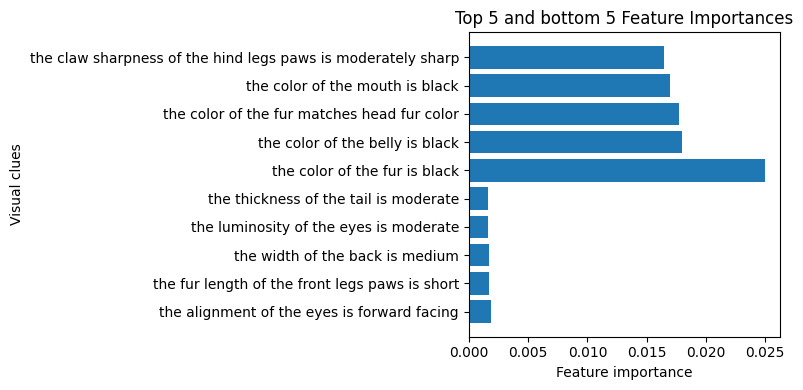

In [15]:
top_10 = feature_importance_df.tail(5)
bottom_10 = feature_importance_df.head(5)

top_and_bottom = pd.concat([top_10, bottom_10])

plt.figure(figsize=(8, 4))
plt.barh(top_and_bottom["Feature"], top_and_bottom["Importance"])
plt.title("Top 5 and bottom 5 Feature Importances")
plt.xlabel("Feature importance")
plt.ylabel("Visual clues")
plt.tight_layout()
plt.show()

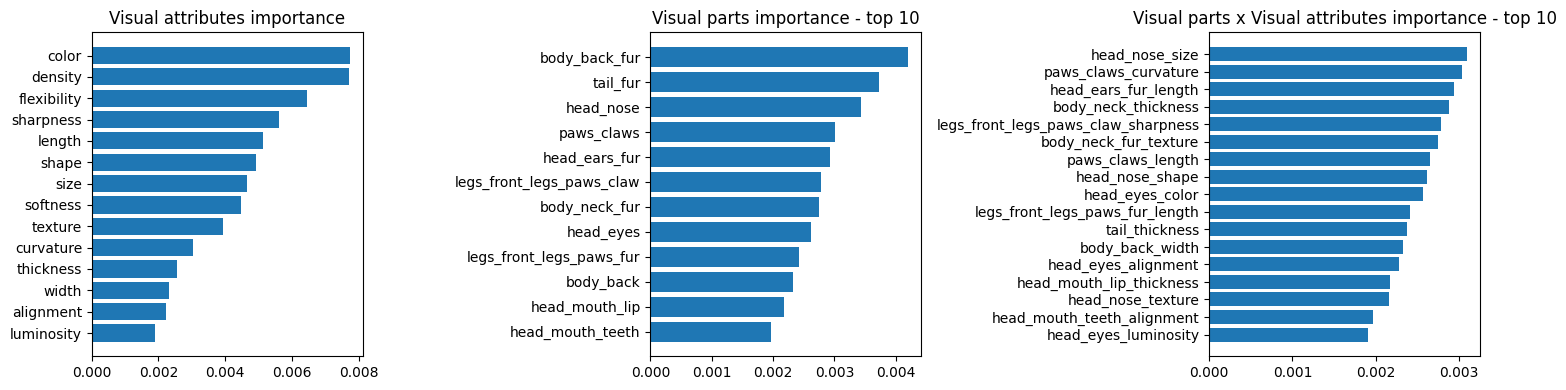

In [16]:
# we rank best visual parts / attributes to classify dogs

def map_to_visual_clue(value):
    for key, values in visual_clues.sorted_values_dict.items():
        if value in values:
            return key
    return None

feature_importance_df['visual_clue'] = feature_importance_df['Feature'].apply(map_to_visual_clue)
feature_importance_df['attribute'] = feature_importance_df['visual_clue'].apply(lambda x: x.split('_')[-1])
feature_importance_df['visual_part'] = feature_importance_df['visual_clue'].apply(lambda x: "_".join(x.split('_')[:-1]))

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,4))

attributes_importance = feature_importance_df.groupby('attribute')['Importance'].mean().sort_values(ascending=True)
axes[0].barh(attributes_importance.index, attributes_importance);
axes[0].set_title('Visual attributes importance');

visual_part_importance = feature_importance_df.groupby('visual_part')['Importance'].mean().sort_values(ascending=True)[:-12]
axes[1].barh(visual_part_importance.index, visual_part_importance);
axes[1].set_title('Visual parts importance - top 10');

visual_clue_importance = feature_importance_df.groupby('visual_clue')['Importance'].mean().sort_values(ascending=True)[:-29]
axes[2].barh(visual_clue_importance.index, visual_clue_importance);
axes[2].set_title('Visual parts x Visual attributes importance - top 10');

plt.tight_layout()

### Which features are the most/least significant for each label?

/opt/conda/envs/libsearch/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


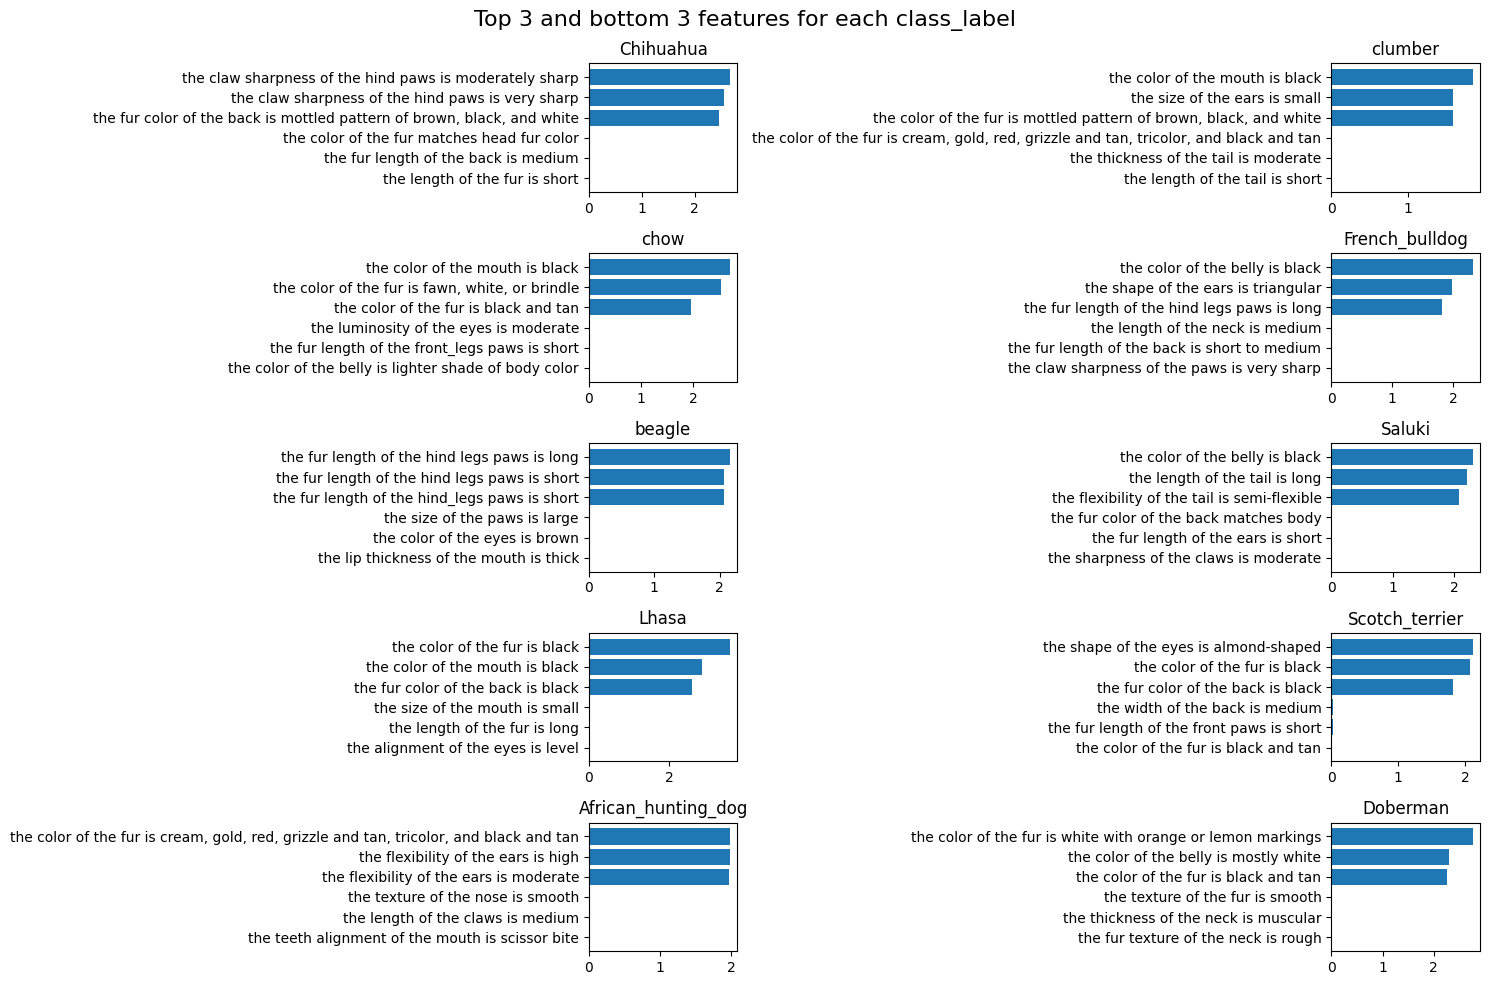

In [17]:
# Focus on feature importance for each class_label
# For that, we need train one vs all logistic regression

ova_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
ova_model.fit(img_classifier.X_train, img_classifier.y_train)

feature_names = img_classifier.X_train.columns
coefficients = ova_model.coef_  # Shape: (n_classes, n_features)

# Convert to DataFrame for easier manipulation
feature_importances = pd.DataFrame(np.abs(coefficients).T,  # Use np.abs() to get absolute values
                                   index=feature_names,
                                   columns=img_classifier.y.unique())

n_classes = len(feature_importances.columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
axes_flat = axes.flatten()

for i, class_label in enumerate(feature_importances.columns):
    top_features = feature_importances[class_label].nlargest(3)
    bottom_features = feature_importances[class_label].nsmallest(3)

    combined_features = pd.concat([top_features, bottom_features])
    combined_features = combined_features.reindex(combined_features.abs().sort_values(ascending=True).index)

    ax = axes_flat[i]
    ax.barh(combined_features.index, combined_features)
    ax.set_title(f"{class_label}")
    ax.axvline(x=0, color='grey', linewidth=0.5)  # Line at zero for reference

fig.suptitle('Top 3 and bottom 3 features for each class_label', fontsize=16)
plt.tight_layout()
plt.show()

### Why did my model misclassify this image?

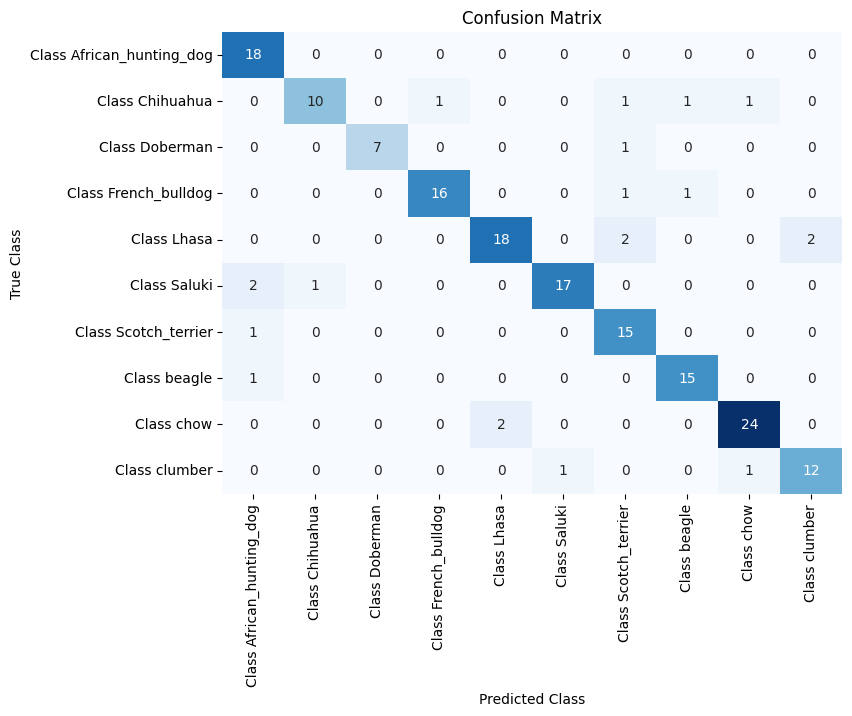

In [18]:
conf_matrix = confusion_matrix(img_classifier.y_test, img_classifier.y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=[f'Class {i}' for i in np.unique(img_classifier.y)],
            yticklabels=[f'Class {i}' for i in np.unique(img_classifier.y)])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# focus on most confusing classes
# how many most important features do they have in common among their top 30 ?

class_label1 = 'chow'
class_label2 = 'Lhasa'

top_features_class_label1 = feature_importances[class_label1].nlargest(30).index
top_features_class_label2 = feature_importances[class_label2].nlargest(30).index
common_features = top_features_class_label1.intersection(top_features_class_label2)
common_feature_values = feature_importances.loc[common_features, [class_label1, class_label2]]
common_feature_values

,chow,Lhasa
the color of the mouth is black,2.708442,2.808887
"the color of the fur is fawn, white, or brindle",2.526489,1.372087
the color of the belly is black,1.747548,1.699614
the color of the belly is mostly white,1.707551,1.406774
the color of the nose is black,1.579798,1.671632
the color of the fur is black,1.525032,3.516078
the texture of the fur is rough,1.483643,1.023841
the density of the fur is sparse,1.416746,0.928976
the thickness of the neck is muscular,1.281191,1.189364
the texture of the fur is coarse,1.245864,0.943513


In [24]:
img_classifier.X_test_label[(img_classifier.X_test_label.class_label == class_label1)&(img_classifier.X_test_label.pred == class_label2)]

,class_label,image_name,pred
405,chow,n02112137_1401,Lhasa
438,chow,n02112137_16777,Lhasa


In [26]:
# to get SHAP values, we need to train a dedicated model where target classes are encoded

X_wo_label = df_model.drop(columns=['class_label', 'image_name'])
y = df_model['class_label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

X_train, X_test, y_train, y_test = train_test_split(X_wo_label, y_encoded, test_size=0.1, random_state=42)

model_shap = RandomForestClassifier(random_state=42, n_jobs=-1)
model_shap.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [27]:
label_mapping

{'African_hunting_dog': 0,
 'Chihuahua': 1,
 'Doberman': 2,
 'French_bulldog': 3,
 'Lhasa': 4,
 'Saluki': 5,
 'Scotch_terrier': 6,
 'beagle': 7,
 'chow': 8,
 'clumber': 9}

In [28]:
index_focus = 405
true_class = img_classifier.X_test_label.loc[index_focus, 'class_label']
true_class_encoded = label_mapping[true_class]
pred_class = img_classifier.X_test_label.loc[index_focus, 'pred']
pred_class_encoded = label_mapping[pred_class]

In [33]:
explainer = shap.TreeExplainer(model_shap)
shap_values = np.array(explainer.shap_values(X_wo_label))
print(shap_values.shape)

sample_shap_values_true = shap_values[index_focus, :, true_class_encoded]
sample_shap_values_pred = shap_values[index_focus, :, pred_class_encoded]

base_value_true = explainer.expected_value[true_class_encoded]
base_value_pred = explainer.expected_value[pred_class_encoded]

sample_features = X_wo_label.loc[index_focus,:]
feature_names = X_wo_label.columns if hasattr(X_wo_label, 'columns') else None

feature_names = list(feature_names)
feature_names_reduced = [map_to_visual_clue(feature)+':'+feature.split('is')[1] if 'is' in feature else feature for feature in feature_names]

(1715, 194, 10)


SHAP values for the true label : chow


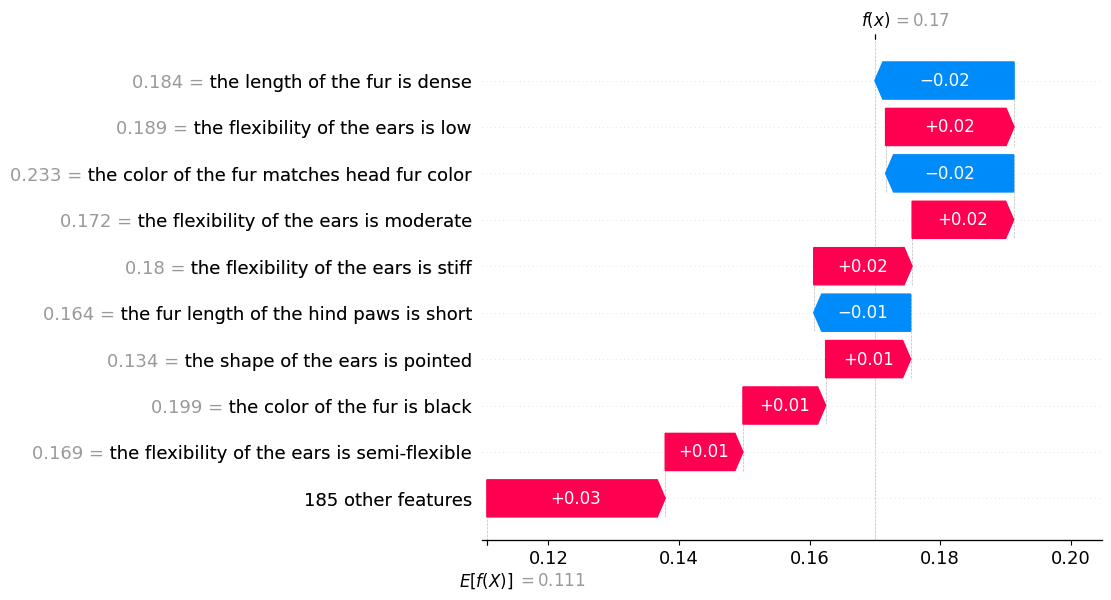

In [34]:
print(f"SHAP values for the true label : {true_class}")

shap.plots.waterfall(
    shap.Explanation(
        values=sample_shap_values_true,
        base_values=base_value_true,
        feature_names=feature_names,
        data=sample_features
    ),
    max_display=10
)

SHAP values for the pred label : Lhasa


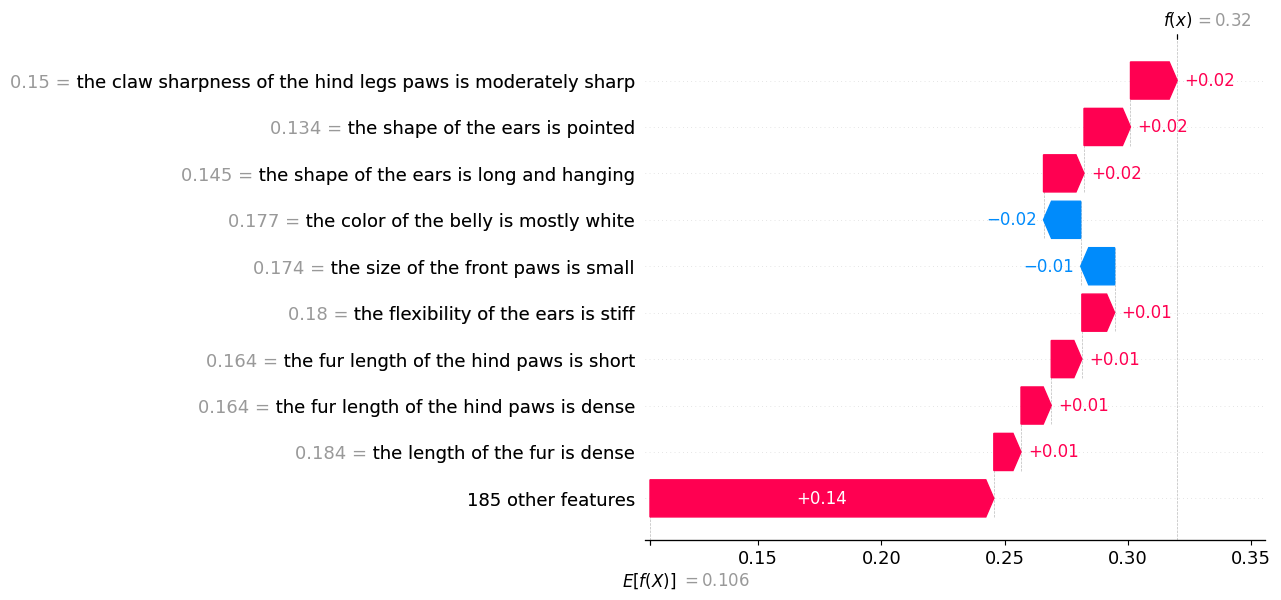

In [35]:
print(f"SHAP values for the pred label : {pred_class}")

shap.plots.waterfall(
    shap.Explanation(
        values=sample_shap_values_pred,
        base_values=base_value_pred,
        feature_names=feature_names,
        data=sample_features
    ),
    max_display=10
)


the true class_label is : chow 
 the predicted class_label is : Lhasa


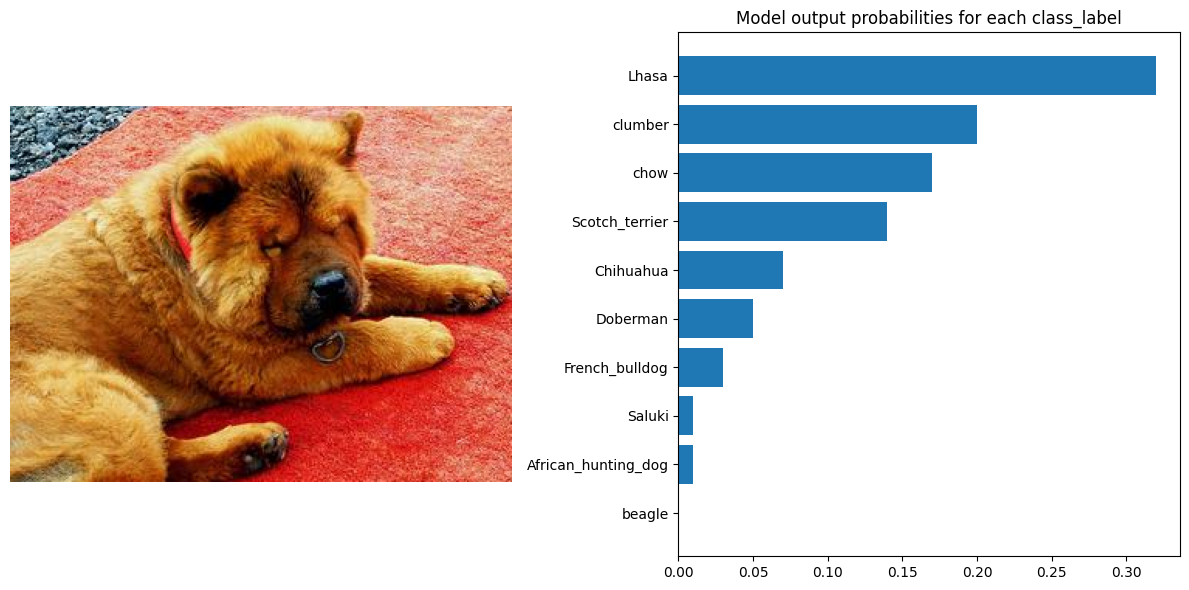

In [37]:
img_classifier.predict(image_name='n02112137-chow/n02112137_1401')